In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import torch, IPython, itertools, string
import random, time, warnings
import matplotlib.pyplot as plt
from matplotlib import animation
from munch import Munch
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


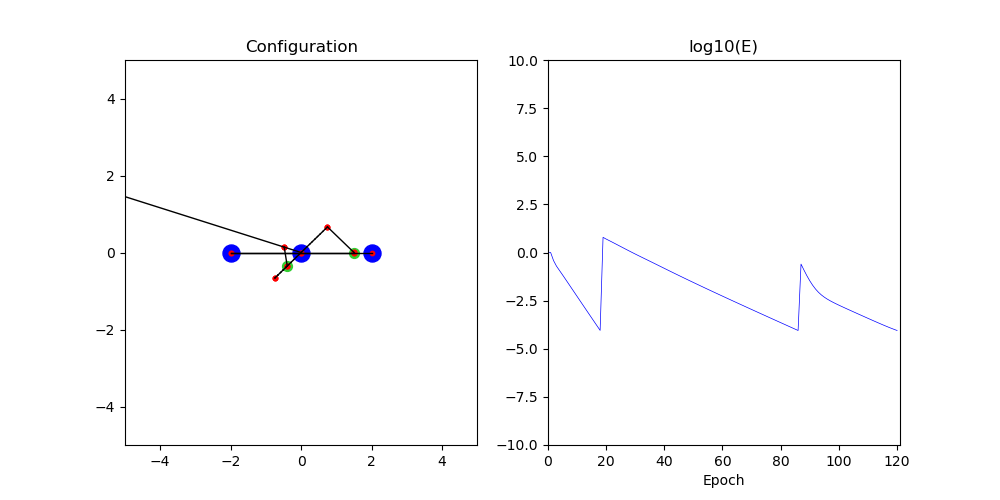

In [4]:
linkage = gs.Linkage(show_origin=False)

In [5]:
A = linkage.add_anchorpoint(at=[0,0,0])

In [6]:
B = linkage.add_anchorpoint(at=[-2,0,0])

In [7]:
C = linkage.add_anchorpoint(at=[2,0,0])

In [8]:
bc = linkage.add_frompointsline(B, C)

In [9]:
D = bc.add_onlinepoint(alpha=0.25)

In [10]:
a = A.add_frompointline(L=1, theta=90)

In [11]:
b = a.p2.add_frompointline(L=1, theta=180)

In [12]:
b2d = linkage.add_frompointsline(b.p2, D)

In [13]:
b2d.constrain_length(0)

In [14]:
bd = linkage.add_frompointsline(B, D)

In [15]:
bd.constrain_length(3.5)

In [16]:
c = A.add_frompointline(L=1, theta=180, ux=a, locked=True)

In [17]:
f = A.add_frompointline(L=0.5, theta=90, ux=a)

In [18]:
h = f.p2.add_frompointline(L=10, theta=0, ux=f, locked=True)

In [19]:
g = f.p2.add_frompointline(L=0.5, theta=90, ux=f)

In [20]:
c2a2 = linkage.add_frompointsline(c.p2, a.p2)

In [21]:
E = c2a2.add_onlinepoint(alpha=0.25)

In [22]:
g2e = linkage.add_frompointsline(g.p2, E)

In [23]:
g2e.constrain_length(0)

In [24]:
c2e = linkage.add_frompointsline(c.p2, E)

In [25]:
#bd.constrain_length(3.55)

In [26]:
#c2e.constrain_length(0.8)

In [27]:
zz

NameError: name 'zz' is not defined